In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

In [2]:
returns = pd.read_csv("../data/weekly_returns.csv")

returns.Date = pd.DatetimeIndex(returns.Date)
returns.set_index("Date",inplace=True)
returns.head()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CPLE6.SA,CSAN3.SA,CSNA3.SA,ELET3.SA,ENBR3.SA,GGBR4.SA,ITUB4.SA,JBSS3.SA,PETR4.SA,SANB11.SA,SULA11.SA,TIMS3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,0.038579,0.029609,0.018518,0.032145,-0.054668,0.039757,0.054168,0.056991,0.019789,0.008492,0.048339,0.007062,-0.019008,-0.010050,0.027588,0.042368,0.080260,-0.027216,0.054612
2010-01-11,0.019564,-0.019300,-0.026413,-0.014483,-0.010191,0.005033,-0.067417,0.047165,-0.023635,-0.045885,0.016924,-0.033015,-0.023733,-0.030363,-0.013699,-0.010875,-0.006713,-0.012511,-0.029853
2010-01-18,0.000125,-0.024574,-0.126901,-0.010667,-0.022880,-0.074748,0.154428,-0.023305,-0.102092,-0.027750,-0.055824,-0.028371,-0.053825,0.039236,-0.006921,-0.078553,-0.056576,-0.006652,-0.044017
2010-01-25,-0.058269,-0.015537,-0.014262,0.032704,-0.072430,0.025784,-0.047791,-0.019608,-0.027634,-0.003315,-0.025371,-0.016831,0.037092,-0.038828,-0.028171,0.064539,-0.032189,0.025804,0.002774
2010-02-01,-0.030459,-0.007142,-0.041713,-0.034313,0.094029,-0.012809,-0.507667,-0.044838,-0.026797,-0.037506,-0.035971,-0.080726,-0.106249,-0.044016,-0.049791,-0.039060,-0.036436,-0.030543,-0.048236


In [11]:
returns.shape

(626, 19)

In [ ]:
p_values = [1]
q_values = [1]
window_values = [14]

df_volatility_all_assets = pd.DataFrame()

for asset in returns:
    print("----------------------------%s---------------------------"%asset)
    
    asset_return = returns.loc[:,asset]
    
    df_volatility_all_assets.index = asset_return.index
    
    for p in p_values:
        for q in q_values:
            for window in window_values:
                
                days = asset_return.index
                df_volatility = pd.DataFrame(index=days)
                volatilities_predicted = [np.nan]*window
                
                for i in range(window,len(days)):
                    window_returns = asset_return[i-window:i]
                    
                    garch_model = arch_model(window_returns.values,p=p,q=q,vol="GARCH").fit()
                    vol_prediction = np.sqrt(garch_model.forecast(horizon=1).variance)
                    print("#######################################################")
                    vol = vol_prediction.dropna().values
                    # print(vol)
                    if len(vol) == 0:
                        # print("nan")
                        vol = volatilities_predicted[-1]
                    else:
                        # print("not nan")
                        vol = vol[0][0]
                    # print(vol)
                    volatilities_predicted.append(vol)
        
        
                df_volatility_all_assets[asset[:-3]] = volatilities_predicted
                nome_arquivo = "../data/volatility_garch_"+str(p)+"_"+str(q)+"_"+str(window)+".csv"
                df_volatility_all_assets.to_csv(nome_arquivo)
     
                  

In [34]:
df_volatility_all_assets

,ABEV3,BBAS3,BBDC4,CPLE6,CSAN3,CSNA3,ELET3,ENBR3,GGBR4,ITUB4,JBSS3,PETR4,SANB11,SULA11,TIMS3,USIM5,VALE3,VIVT3,WEGE3
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,0.051437,0.042720,0.023819,0.042394,0.042951,0.056186,0.047770,0.020879,0.047932,0.045706,0.037178,0.052336,0.030096,0.054238,0.033887,0.090766,0.073293,0.048711,0.047186
2021-12-06,0.051195,0.045227,0.022037,0.032672,0.044189,0.060762,0.056274,0.018211,0.057461,0.042245,0.036852,0.049984,0.027152,0.054672,0.025020,0.091913,0.070955,0.046947,0.042248
2021-12-13,0.046650,0.042257,0.020549,0.031646,0.042129,0.061688,0.053506,0.019785,0.051234,0.028626,0.039135,0.068500,0.032633,0.052350,0.052785,0.089921,0.068699,0.048429,0.054526


In [35]:
df_historical_volatility = pd.DataFrame(index = returns.index,columns=returns.columns.values)
window = 14

# df_historical_volatility.iloc[0:7,:] = np.nan


for asset in returns:
    print("----------------------------%s---------------------------"%asset)
    
    asset_return = returns.loc[:,asset]
    vol_naive = [np.nan]*window
    for i in range(window,asset_return.shape[0]):
        
        vol_naive.append((asset_return[i-window:i].std())*(np.sqrt(window)))
    # print(len(vol_naive))
    df_historical_volatility[asset] = vol_naive

df_historical_volatility
    

----------------------------ABEV3.SA---------------------------
----------------------------BBAS3.SA---------------------------
----------------------------BBDC4.SA---------------------------
----------------------------CPLE6.SA---------------------------
----------------------------CSAN3.SA---------------------------
----------------------------CSNA3.SA---------------------------
----------------------------ELET3.SA---------------------------
----------------------------ENBR3.SA---------------------------
----------------------------GGBR4.SA---------------------------
----------------------------ITUB4.SA---------------------------
----------------------------JBSS3.SA---------------------------
----------------------------PETR4.SA---------------------------
----------------------------SANB11.SA---------------------------
----------------------------SULA11.SA---------------------------
----------------------------TIMS3.SA---------------------------
----------------------------USIM5.SA--

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CPLE6.SA,CSAN3.SA,CSNA3.SA,ELET3.SA,ENBR3.SA,GGBR4.SA,ITUB4.SA,JBSS3.SA,PETR4.SA,SANB11.SA,SULA11.SA,TIMS3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,0.167293,0.143050,0.127982,0.174686,0.155527,0.197826,0.166256,0.078562,0.214442,0.209690,0.123561,0.237195,0.146032,0.177094,0.179456,0.353129,0.252613,0.158652,0.168055
2021-12-06,0.169973,0.152066,0.124966,0.175665,0.164355,0.208055,0.188651,0.078853,0.222433,0.205807,0.129417,0.200875,0.137760,0.183794,0.180292,0.358946,0.256027,0.155153,0.164909
2021-12-13,0.167984,0.145411,0.118999,0.176013,0.163579,0.217845,0.184612,0.078372,0.219670,0.206017,0.136674,0.229391,0.126726,0.175561,0.183403,0.345159,0.264868,0.157719,0.190465


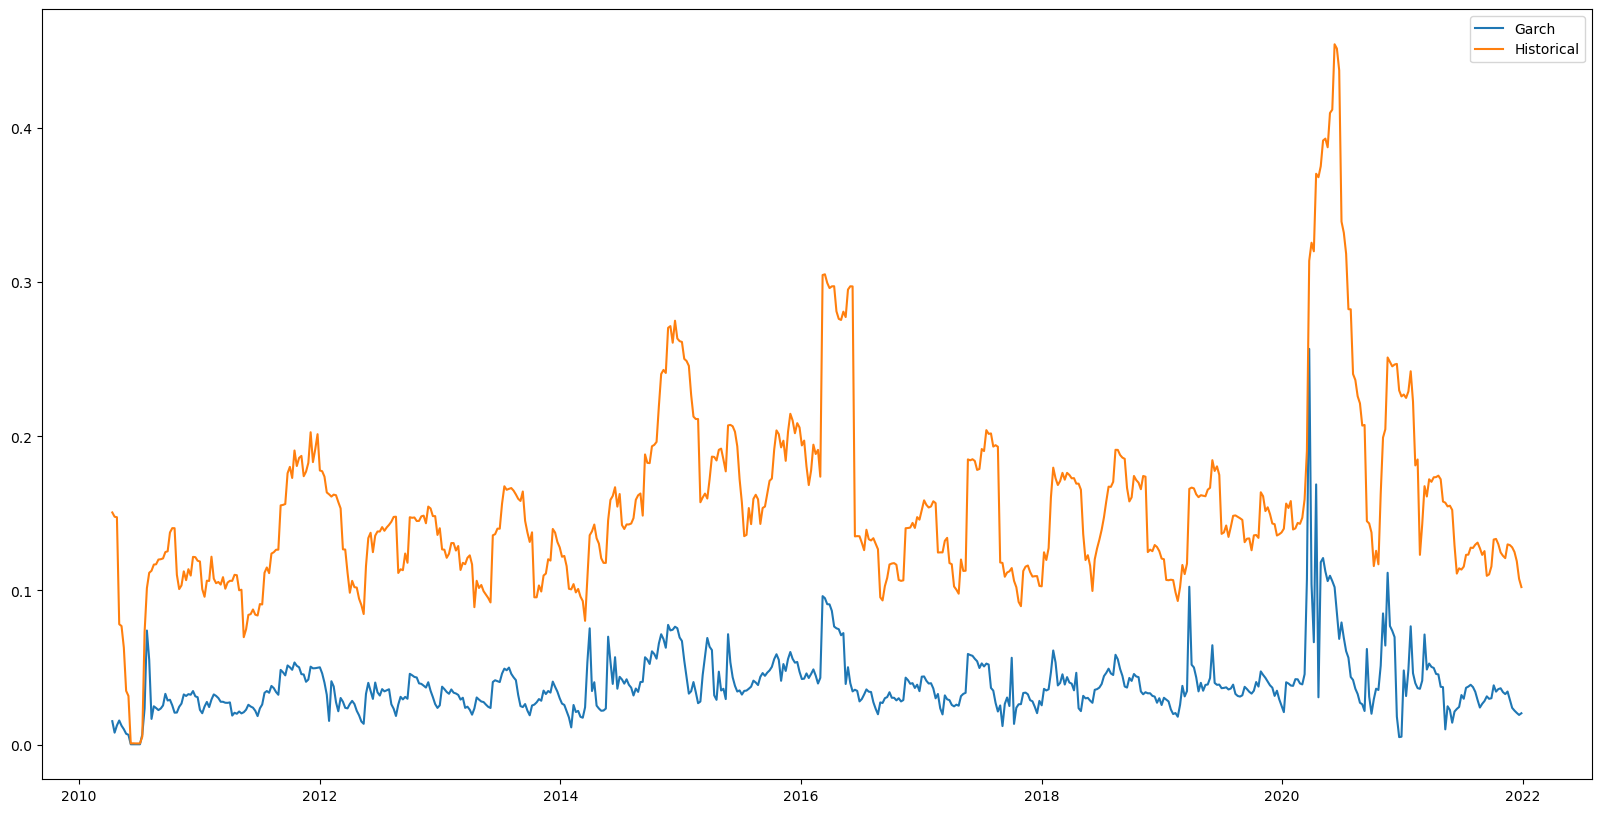

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df_volatility_all_assets.iloc[:,2],label="Garch")
plt.plot(df_historical_volatility.iloc[:,2],label="Historical")
plt.legend()
plt.show()